## Observations and Insights 

In [1]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_total = mouse_df["Mouse ID"].count()
mice_total

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_duplicated_df = mouse_df[mouse_df.duplicated(["Mouse ID", "Timepoint"])]
mice_duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_duplicated_df = mouse_df.drop_duplicates("Mouse ID")
mice_duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_duplicated_df["Mouse ID"].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
each_regimen = mouse_df.groupby("Drug Regimen")
each_regimen.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_drug = each_regimen["Tumor Volume (mm3)"].mean()
median_drug = each_regimen["Tumor Volume (mm3)"].median()
variance_drug = each_regimen["Tumor Volume (mm3)"].var()
stand_drug = each_regimen["Tumor Volume (mm3)"].std()
sem_drug = each_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean_drug, 
                           "Median": median_drug,
                           "Variance": variance_drug, 
                           "Standard Deviation": stand_drug,
                           "sem_drug": sem_drug 
                          })
summary_df

,Mean,Median,Variance,Standard Deviation,sem_drug
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_each_regimen = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
# Using the aggregation method, produce the same summary statistics in a single line
sum_each_regimen

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

<IPython.core.display.Javascript object>


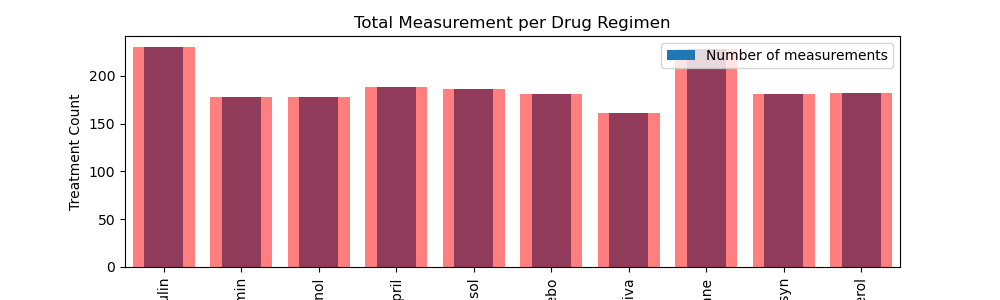

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_copied =mouse_df.groupby(["Drug Regimen"]).count().reset_index()

drug_regimen_df = drug_regimen_copied[["Drug Regimen", "Mouse ID"]]

drug_regimen_df = drug_regimen_df.rename(columns = {"Mouse ID" : "Number of measurements"})

drug_regimen_df=drug_regimen_df.set_index("Drug Regimen")

drug_regimen_df.plot(kind = "bar", figsize=(10,3))
plt.title("Total Measurement per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Treatment Count")
plt.legend(loc = "upper right")


In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
number_measurement = mouse_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
x_axis = np.arange(len(number_measurement))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin", "Ceftamin", "Infubinol", "Ketapril","Naftisol", "Placebo", "Propriva","Ramicane", "Stelasyn", "Zoniferol"], rotation = 'vertical' )
plt.bar(x_axis, number_measurement, color='r', alpha = 0.5, align = 'center')
plt.title("Total Measurement per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Treatment Count")

Text(83.09722222222221, 0.5, 'Treatment Count')

<IPython.core.display.Javascript object>


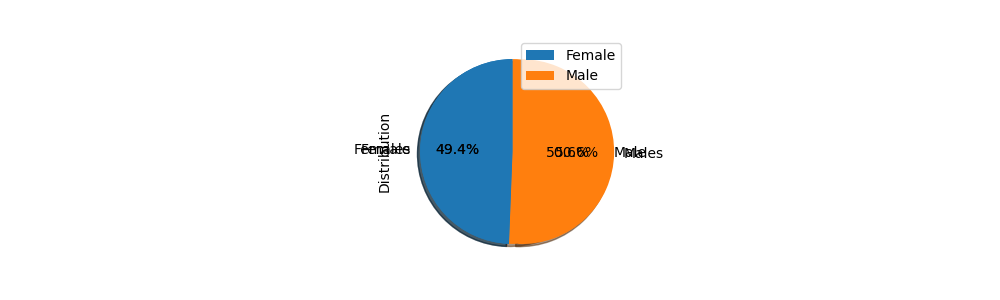

<AxesSubplot:ylabel='Distribution'>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_copied = mouse_df.groupby("Sex").count().reset_index()
gender_df = mice_gender_copied[["Sex", "Mouse ID"]]
gender_df = gender_df.rename(columns = {"Mouse ID" : "Distribution"})

gender_df.plot(kind='pie', y="Distribution", figsize=(10,3),labels = gender_df["Sex"], autopct='%1.1f%%', startangle = 90, shadow = True)

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = mouse_df.groupby(["Sex"])["Mouse ID"].count().tolist()
gender_distribution

labels = ["Females", "Males"]
explode = (0,0.1)

plt.pie(gender_distribution, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)


([<matplotlib.patches.Wedge at 0x175cf126a90>,
 [Text(-1.0997996703027118, 0.02099250347258563, 'Females'),
  Text(1.1997814585120492, -0.022900912879185, 'Males')],
 [Text(-0.5998907292560246, 0.01145045643959216, '49.4%'),
  Text(0.699872517465362, -0.01335886584619125, '50.6%')])

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_sorted_df= mouse_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = treatment_sorted_df.loc[treatment_sorted_df["Timepoint"]==45]
last_timepoint_df.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...,...
125,1344,p136,Zoniferol,Female,5,28,45,63.488697,2
126,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
127,1434,q633,Zoniferol,Male,12,25,45,70.827796,2
128,1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

<IPython.core.display.Javascript object>


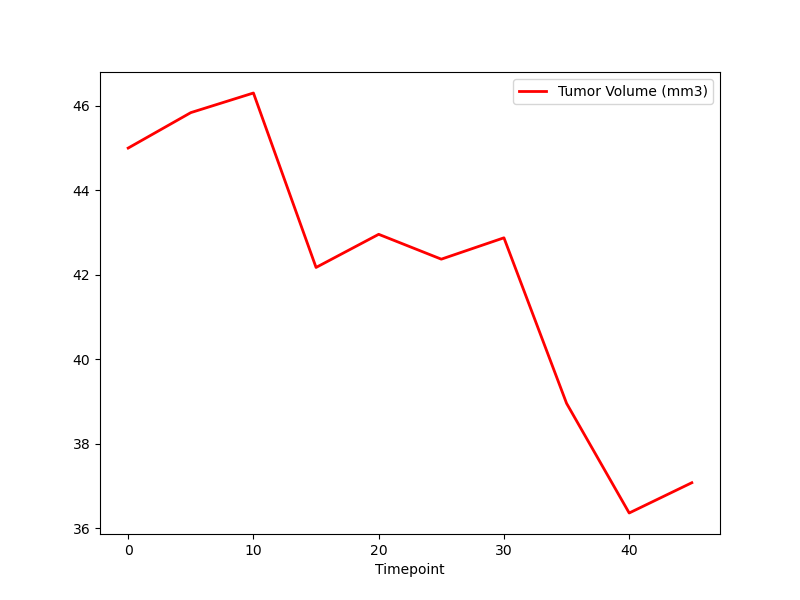

<AxesSubplot:xlabel='Timepoint'>

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_treatment_df = mouse_df.loc[mouse_df["Drug Regimen"]=="Capomulin"].reset_index()
one_example_df = capomulin_treatment_df.loc[capomulin_treatment_df["Mouse ID"]=="g288"]
one_example_df = one_example_df.loc[:,["Timepoint","Tumor Volume (mm3)"]].reset_index(drop = True)
one_example_df.set_index("Timepoint").plot(kind='line', figsize=(8,6), linewidth =2.0, color='r')

<IPython.core.display.Javascript object>


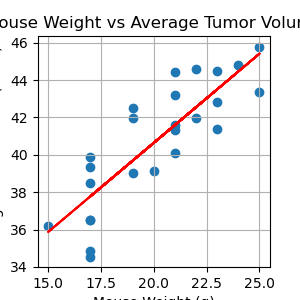

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight_df = capomulin_treatment_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]



avg_vol_df = pd.DataFrame(mouse_weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_vol_df= avg_vol_df.rename(columns={"Tumor Volume (mm3)":"Average Volume"}).set_index("Mouse ID")





avg_vol_df.plot(kind="scatter",x="Weight (g)", y="Average Volume", grid=True, figsize=(3,3), title ="Mouse Weight vs Average Tumor Volume")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight_reduced_df = avg_vol_df.iloc[:,0]
avg_tumor_vol_df = avg_vol_df.iloc[:,1]
correlation = st.pearsonr(mouse_weight_reduced_df, avg_tumor_vol_df)
print(f" The correlation coeffiecent between mouse weight and average tumor volume is {round(correlation[0],2)}")

 The correlation coeffiecent between mouse weight and average tumor volume is 0.84


In [19]:
from scipy.stats import linregress

x_values= avg_vol_df["Weight (g)"]
y_values= avg_vol_df["Average Volume"]



(slope, intercept, rvalue, pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(0,50), fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
